# 22i1239 Tauha lab 12 cs-g

# **Lab Task: Build K‑Nearest Neighbors (KNN) Classifier from Scratch**

## **Objective :**
- Implement the KNN classification algorithm in Python without using scikit‑learn’s KNeighborsClassifier.

- Practice data loading, cleaning, feature scaling, and train/test splitting.

- Evaluate your classifier’s performance using accuracy, precision, recall, and a confusion matrix.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from scipy import stats

## **1. Data loading**


In [17]:
import kagglehub
import pandas as pd

# Step 1: Download latest version of the dataset
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Path to dataset files:", path)

# Step 2: Load the dataset
df = pd.read_csv(f"{path}/data.csv", index_col='id').reset_index(drop=True)
df.head()
print(df.dtypes)

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst       

## **2. Data Preprocessing**

- **Identify missing values**
- **Handle missing data (choose one)**
- **Feature scaling**
- **Train/Test split**: Split into 70% train / 30% test (use random_state=42).

In [21]:
#dropping missing column Unnamed: 32
#df.drop('Unnamed: 32', axis=1, inplace=True)


#splittting dataset / dataframe
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

#print(df.isnull())
    # or
#print(df.isna())
#print(df.isnull().sum())
#print(df.isnull().sum().sum())

#train_df.head()
test_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,B,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,M,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,M,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,B,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,B,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


## **Implement KNN Class**

In [64]:
class kNN():
    '''k-Nearest Neighbours'''
    # Initialise
    def __init__(self, k=3, metric='euclidean', p=2):
        self.k = k
        self.metric = metric
        self.p = p
        self.X_train = None # has entire column
        self.y_train = None # for checking results
        self.neighbours = None #distances lol
        self.results = None # my results lol

    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
      value = 0.0
      for i in range(len(v1)):
        # Check if both elements are numeric using isinstance
        if isinstance(v1[i], (int, float)) and isinstance(v2[i], (int, float)):
          value = value + (v1[i] - v2[i])**2
      return np.sqrt(value)


    # Manhattan distance (l1 norm)
    def manhattan(self, v1, v2):
      value = 0.0
      for i in range(len(v1)):
        # Check if both elements are numeric using isinstance
        if isinstance(v1[i], (int, float)) and isinstance(v2[i], (int, float)):
          value = value + np.abs(v1[i] - v2[i])
      return value


    # Minkowski distance (lp norm)
    def minkowski(self, v1, v2, p=2):
      value = 0.0
      for i in range(len(v1)):
        # Check if both elements are numeric using isinstance
        if isinstance(v1[i], (int, float)) and isinstance(v2[i], (int, float)):
          value = value + (np.abs(v1[i] - v2[i]))**p
      return (value**(1.0/p))


    # Store train set
    def fit(self, X_train, y_train):
      # Basic input validation
      #STORING THE VALUES
      self.X_train = X_train
      self.y_train = y_train


    # Make predictions
    def predict(self, X_test): # Include y_test
      self.results = []
      for i, test_row in enumerate(X_test): # Enumerate to get row number
        neighbours = self.get_neighbours(test_row)
        if neighbours is None:
          print('NO Neighbhours...')
          return None
        else:
          #find most occuring values...
          Bcount = 0
          Mcount = 0
          prediction = ''
          for neighbour in neighbours:
            if neighbour[-1] == 'B':
              Bcount += 1
            elif neighbour[-1] == 'M':
              Mcount += 1

          if Bcount > Mcount:
            prediction = 'B'
          else:
            prediction = 'M'

          output_values = [row[-1] for row in neighbours]
          # Check if output_values has more than one unique value before calling stats.mode
          #if len(set(output_values)) > 1:
              #heuristic_val = stats.mode(output_values)[0][0] # show's distance value
          #else:
          heuristic_val = output_values[0] if output_values else None # Handle single or no values

          actual = test_row[0] # Get actual diagnosis if it is in the first column, update the column number if it is not column 0
          # If actual diagnosis is not in the first column (index 0) modify accordingly
          # For example, if the actual diagnosis is in the last column, it should be:
          # actual = test_row[-1]
          self.results.append((i, prediction, heuristic_val, actual)) # Store all information
      return self.results



# Get nearest neighbours
    def get_neighbours(self, test_row):
      distances = list()
      # Calculate distance to all points in X_train
      if self.X_train is None:
        return None
      else:
        for train_row in self.X_train:
          if self.metric == 'euclidean':
            dist = self.euclidean(test_row, train_row)
            if dist is None:
              return None
            else:
              distances.append([train_row[0], dist]) # Append diagnosis and distance
          elif self.metric == 'manhattan':
            dist = self.manhattan(test_row, train_row)
            if dist is None:
              return None
            else:
              distances.append([train_row[0], dist])  # Append diagnosis and distance
          elif self.metric == 'minkowski':
            dist = self.minkowski(test_row, train_row, self.p)
            if dist is None:
              return None
            else:
              distances.append([train_row[0], dist])  # Append diagnosis and distance

        # Sort distances
        distances.sort(key=lambda tup: tup[1])

        # Identify k nearest neighbours (only diagnosis)
        neighbours = list()
        for i in range(self.k):
          neighbours.append(distances[i][0]) # Append only the diagnosis
          #print(neighbours)

        return neighbours

Testing model...

In [65]:
myEucladiean = kNN(3, 'euclidean')
myManhattan = kNN(3, 'manhattan')
myMinkowski = kNN(3, 'minkowski', 2)

myEucladiean.fit(train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values)
myManhattan.fit(train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values)
myMinkowski.fit(train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values)

E_ans  = myEucladiean.predict(test_df.iloc[:, :-1].values)
Ma_ans = myManhattan.predict(test_df.iloc[:, :-1].values)
Mi_ans = myMinkowski.predict(test_df.iloc[:, :-1].values)

def print_results(res):
  print("Index\tPredicted\tHeuristic\tActual")
  for i in range(len(res)):
    print(f"{res[i][0]}\t{res[i][1]}\t\t{res[i][2]}\t\t{res[i][3]}")

#print(E_ans)
#print(Ma_ans)
#print(Mi_ans)

print("Euclidean:")
print_results(E_ans)
print("Manhattan:")
print_results(Ma_ans)
print("Minkowski:")
print_results(Mi_ans)
#


Euclidean:
Index	Predicted	Heuristic	Actual
0	M		B		B
1	M		M		M
2	M		M		M
3	B		B		B
4	B		B		B
5	M		M		M
6	M		M		M
7	M		M		M
8	B		B		B
9	B		B		B
10	B		B		B
11	M		M		M
12	B		B		B
13	B		B		M
14	B		B		B
15	M		M		M
16	B		B		B
17	B		B		B
18	B		B		B
19	M		M		M
20	M		B		M
21	B		B		B
22	M		M		M
23	B		B		B
24	B		B		B
25	B		B		B
26	B		B		B
27	B		B		B
28	B		B		B
29	M		M		M
30	B		B		B
31	B		B		B
32	B		B		B
33	M		M		B
34	B		B		B
35	B		B		B
36	M		M		M
37	B		B		B
38	M		M		M
39	B		B		B
40	B		B		B
41	M		M		M
42	B		B		B
43	B		B		B
44	B		B		B
45	B		B		B
46	B		B		B
47	B		B		B
48	B		B		B
49	B		B		B
50	M		M		M
51	M		M		M
52	B		B		B
53	B		B		B
54	B		B		B
55	B		B		B
56	B		B		B
57	M		M		M
58	B		B		M
59	B		B		B
60	B		B		B
61	M		M		M
62	M		M		M
63	B		B		B
64	B		B		B
65	B		B		B
66	M		M		M
67	M		M		M
68	B		B		B
69	B		B		B
70	B		M		M
71	M		M		M
72	B		B		B
73	B		B		M
74	B		B		B
75	B		B		B
76	B		B		B
77	B		B		M
78	B		B		B
79	B		B		B
80	M		M		M
81	B		B		B
82	B		B		M
83	M		M		M
84	M		M		M
85	M		M		M
86	M		M		M
87	M		M		

## **Evaluate the model**


Fine the following performance matrices results:
- Accuracy (overall correct rate)

- Precision (true positives ÷ predicted positives)

- Recall (true positives ÷ actual positives)

- Confusion Matrix

- Classfication Report

Accuracy: 0.9415204678362573
Precision: 0.9344262295081968
Recall: 0.9047619047619048
F1 Score: 0.9193548387096774
Confusion Matrix:
[[104   4]
 [  6  57]]


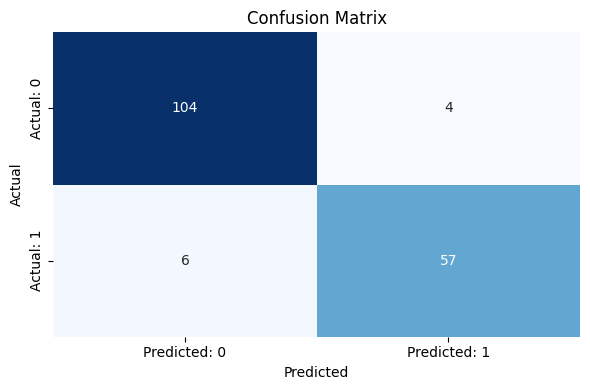


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
testModl = kNN()
testModl.fit(train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values)
test_ans = testModl.predict(test_df.iloc[:, :-1].values)

y_test = []
y_pred = []

for i in range(len(test_ans)):
  if test_ans[i][1] == 'B':
    y_pred.append(0)
  else:
    y_pred.append(1)

  if test_ans[i][3] == 'B':
    y_test.append(0)
  else:
    y_test.append(1)

# B -> 1
# M -> 0

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: 0', 'Predicted: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

## **Effect of k on Classification Accuracy**

- For each k from 3 to 29, fit your k‑NN on the training set and record test accuracy.

- Plot k (on the x‑axis) vs. accuracy (on the y‑axis), with markers and clear labels.

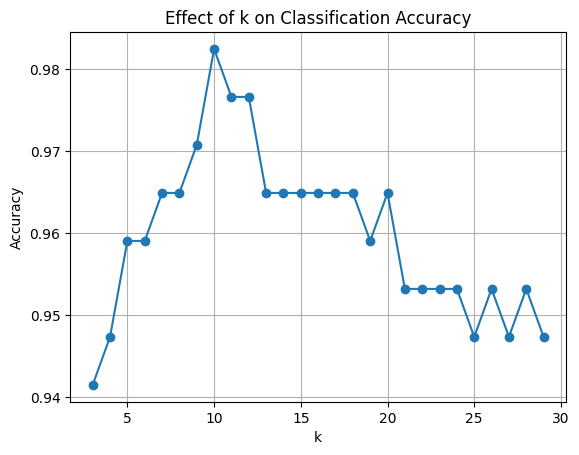

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Range of k values
k_values = range(3, 30)

# Store accuracies for each k
accuracies = []

# Iterate through k values
for k in k_values:
    # Create and fit the kNN model
    knn_model = kNN(k=k)
    knn_model.fit(train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values)

    # Predict on the test set
    predictions = knn_model.predict(test_df.iloc[:, :-1].values)

    # Extract predicted labels
    actual_labels_numerical = []
    predicted_labels_numerical = []

    #predicted_labels = [pred[1] for pred in predictions]
    for i in range(len(predictions)):
        if predictions[i][1] == 'B':
          predicted_labels_numerical.append(0)
        else:
          predicted_labels_numerical.append(1)

        if predictions[i][3] == 'B':
          actual_labels_numerical.append(0)
        else:
          actual_labels_numerical.append(1)

    # Convert predicted and actual labels to numerical format if necessary
    # For example, if your labels are 'B' and 'M', you might need to map them to 0 and 1
    #predicted_labels_numerical = [0 if label == 'B' else 1 for label in predicted_labels]
    #actual_labels_numerical = [0 if label == 'B' else 1 for label in test_df.iloc[:, -1].values]

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(actual_labels_numerical, predicted_labels_numerical)
    accuracies.append(accuracy)

# Plot k vs. accuracy
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Effect of k on Classification Accuracy')
plt.grid(True)
plt.show()